In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Método de Búsqueda Binaria

In [29]:
def busqueda_binaria(x1, x2, f, tol):
    if (f(x1) < 0 and f(x2) > 0) or (f(x1) > 0 and f(x2) < 0):
        while True:
            x_prim = 0.5 * (x1 + x2)
            if f(x_prim) * f(x2) > 0:
                x2 = x_prim
            elif f(x_prim) * f(x1) > 0:
                x1 = x_prim
            res = abs(x1 - x2)
            if res < tol:
                return x_prim  # Devuelve la raíz encontrada
    else:
        print("x1 y x2 tienen que tener diferente signo")
        return None

In [33]:
funcion = lambda x: 5 * math.exp(-x) + x - 5
tolerancia = 1e-6
x1 = 1
x2 = -2
raiz_b = busqueda_binaria(x1, x2, funcion, tolerancia)
print(raiz_b)

2.384185791015625e-07


In [50]:
def funcion(x):
    return (5 * math.exp(-x) + x - 5)

def buscarraiz(a,b,funcion): 
    for i in range(a,b,1):
        if (funcion(i)*funcion(i+1))<=0:
            print("raíz a: ", busqueda_binaria(i, i+1, funcion, tolerancia))
            if i == 4:
                return busqueda_binaria(i, i+1, funcion, tolerancia)
        elif (funcion(i)*funcion(i+2))<=0:
            print("raíz b: ", busqueda_binaria(i, i+2, funcion, tolerancia))

Nuestra función solo encontraba la primera raíz, entonces, se elaboró esta función para recorrer el eje x, y así encontrar la raíz que es de interés. Esto lo pudimos saber al analizar la gráfica y ver en que otro punto la función toca el eje x en cero.

In [51]:
a = -10
b = 10
raiz_b = buscarraiz(a,b,funcion)

x1 y x2 tienen que tener diferente signo
raíz b:  None
x1 y x2 tienen que tener diferente signo
raíz a:  None
x1 y x2 tienen que tener diferente signo
raíz a:  None
raíz b:  4.965113639831543
raíz a:  4.965113639831543


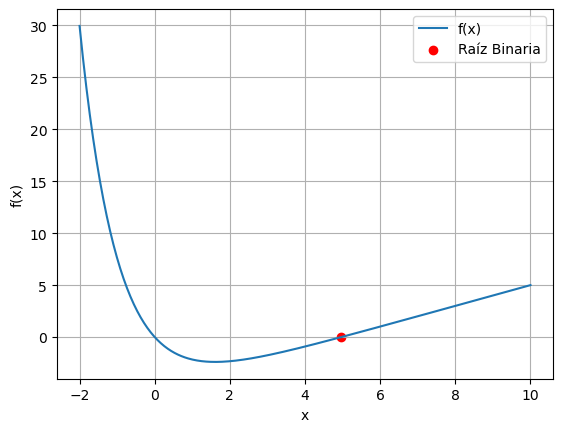

La raíz encontrada es: 4.965113639831543


In [48]:
x_valores = np.linspace(-2, 10, 400)
y_valores = [funcion(x) for x in x_valores]

plt.plot(x_valores, y_valores, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.scatter(raiz_b, funcion(raiz_b), color='red', label='Raíz Binaria', marker='o')
plt.legend()

plt.grid()
plt.show()

print("La raíz encontrada es:", raiz_b)

## Método de Newton-Raphson

In [66]:
def newton_raphson(f, f_prime, x0, tol, max_i):
    x = x0
    i = 0

    while i < max_i:
        x_n = x - f(x) / f_prime(x)
        if abs(x_n - x) < tol:
            return x_n  
        x = x_n
        i += 1

    print("El Método de Newton-Raphson no convergió después de", max_i, "iteraciones.")
    return None

In [67]:
funcion = lambda x: 5 * math.exp(-x) + x - 5
funcion_derivada = lambda x: 5 * math.exp(-x) + 1

x0 = 1
tolerancia = 1e-6
max_i = 100

raiz = newton_raphson(funcion, funcion_derivada, x0, tolerancia, max_i)

if raiz is not None:
    print("La raíz encontrada es:", raiz)
else:
    print("El método no convergió.")

La raíz encontrada es: 4.9651142265079455


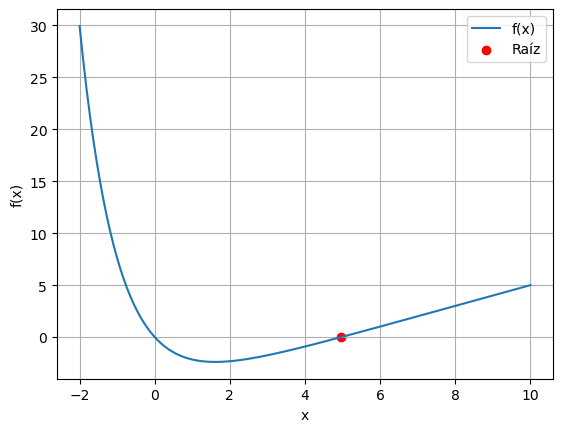

La raíz encontrada es: 4.9651142265079455


In [68]:
x_valores = np.linspace(-2, 10, 400)
y_valores = [funcion(x) for x in x_valores]

plt.plot(x_valores, y_valores, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')

plt.scatter(raiz, funcion(raiz), color='red', label='Raíz', marker='o')
plt.legend()

plt.grid()
plt.show()

if raiz is not None:
    print("La raíz encontrada es:", raiz)
else:
    print("El método no convergió.")

In [69]:
print(raiz_b)
print(raiz)

4.965113639831543
4.9651142265079455


En resumen, la elección entre el método de búsqueda binaria y el Método de Newton-Raphson depende de las condiciones iniciales y la naturaleza de la función objetivo. El Método de Newton-Raphson tiende a ser más eficiente y convergente cuando se tiene una suposición inicial cercana a la raíz y la función es suave y bien comportada. Por otro lado, la búsqueda binaria es más robusta y puede converger en una variedad más amplia de situaciones, aunque a expensas de una convergencia más lenta. 
En nuestro caso en el método de búsqueda binaria nos falto encontrar los demas ceros, pero en la grafica podemos ver que si existen más y es el encontrado en con el el Método de Newton-Raphson.

## Constante de desplazamiento de Wien

In [73]:
h = 6.62607015e-34  # Planck's constant in m^2 kg / s
c = 299792458  # Speed of light in m / s
k = 1.380649e-23  # Boltzmann constant in J/K

Wein_binaria = (h*c)/(k*raiz_b)
Wein_RN = (h*c)/(k*raiz)

print(f"constante de wein por el método de búsqueda binaria:", Wein_binaria)
print(f"constante de wein por el método de Newton-Raphson:", Wein_RN)

constante de wein por el método de búsqueda binaria: 0.0028977723006411364
constante de wein por el método de Newton-Raphson: 0.0028977719582412337


## Temperatura del Sol

In [71]:
def T_Sol(b1, b2):
    return b1 / 502e-9, b2 / 502e-9

In [75]:
TsolBin, TsolRN = T_Sol(Wein_binaria, Wein_RN)

print(f"la temperatura en el sol con el método de búsqueda binaria:", TsolBin,"K")
print(f"la temperatura en el sol con el método de Newton-Raphson:", TsolRN,"K")

la temperatura en el sol con el método de búsqueda binaria: 5772.454782153658 K
la temperatura en el sol con el método de Newton-Raphson: 5772.454100082138 K


Podemos concluir que estos dos métodos tienen resultados casi iguales, recomendaríamos utilizar el método de Newton-Raphson, ya que este es más eficaz a la hora de encontrar la raíz.